In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, svm
from numpy import asarray
from matplotlib import image
from os import listdir

In [5]:
data, targets = ([], [])
for label in ['2', '3', '7', 'S', 'W']:
    url = 'persian_LPR/' + label + '/'
    for filename in listdir(url):
        targets.append(label)
        data.append(asarray(image.imread(url + filename)))
data, targets = (np.array(data), np.array(targets))
data = data / 255
data_vector = data.reshape((len(data), -1))

In [8]:
def run_rbf(input_data, input_targets, k = 2): # k-fold
  classifier = sklearn.svm.SVC(kernel = 'rbf')
  scores = sklearn.model_selection.cross_validate(classifier, input_data, input_targets, cv = k, scoring = 'accuracy', return_train_score = True, return_estimator = True)
  index = np.argmax(scores["test_score"])
  print("Train score: " + str(scores["train_score"][index]))
  print("Test score: " + str(scores["test_score"][index]))
  return scores['estimator'][index]

def run_linear(input_data, input_targets, k = 2): # k-fold
  classifier = sklearn.svm.SVC(kernel = 'linear')
  scores = sklearn.model_selection.cross_validate(classifier, input_data, input_targets, cv = k, scoring='accuracy', return_train_score=True, return_estimator = True)
  index = np.argmax(scores["test_score"])
  print("Train score: " + str(scores["train_score"][index]))
  print("Test score: " + str(scores["test_score"][index]))
  return scores['estimator'][index]

def run_polynomial(input_data, input_targets, degree, constant_coeff, k = 2): # k-fold
  classifier = sklearn.svm.SVC(kernel = 'poly', degree = degree, coef0 = constant_coeff)
  scores = sklearn.model_selection.cross_validate(classifier, input_data, input_targets, cv = k, scoring='accuracy', return_train_score=True, return_estimator = True)
  index = np.argmax(scores["test_score"])
  print("Train score: " + str(scores["train_score"][index]))
  print("Test score: " + str(scores["test_score"][index]))
  return scores['estimator'][index]

In [9]:
linear_classifier = run_linear(data_vector, targets)

Train score: 0.9746666666666667
Test score: 0.9693333333333334


In [10]:
rbf_classifier = run_rbf(data_vector, targets)

Train score: 0.968
Test score: 0.9533333333333334


In [13]:
polynomial_classifier = run_polynomial(data_vector, targets, degree = 3, constant_coeff = 1)

Train score: 0.9866666666666667
Test score: 0.968


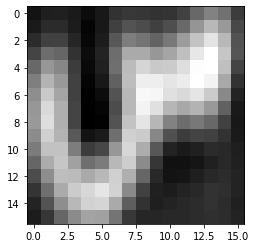

Real label: W
Linear result: S
RBF result: S
Polynomial result: S


In [30]:
while True:
    index = np.random.randint(0, len(data))
    if targets[index] != linear_classifier.predict([data_vector[index]])[0] or targets[index] != rbf_classifier.predict([data_vector[index]])[0] or targets[index] != polynomial_classifier.predict([data_vector[index]])[0]:
        plt.imshow(data[index], cmap = 'gray')
        plt.show()
        print("Real label: " + str(targets[index]))
        print("Linear result: " + str(linear_classifier.predict([data_vector[index]])[0]))
        print("RBF result: " + str(rbf_classifier.predict([data_vector[index]])[0]))
        print("Polynomial result: " + str(polynomial_classifier.predict([data_vector[index]])[0]))
        break